<a href="https://colab.research.google.com/github/priya1804/THE-PIMA-INDIAN-DIABETES-DATABASE/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1.Load the basic libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#Loading the dataset
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# 3. Analyze the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 4.    Normalize the data
def Feature_Normalization(X):
  X = (X - np.mean(X , axis = 0)) / np.std(X , axis = 0)
  return X , np.mean(X , axis = 0) ,  np.std(X , axis = 0)


In [9]:
# 5.    Pre-process the data
X = data.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = data['Outcome']  # Target variable (Outcome column)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

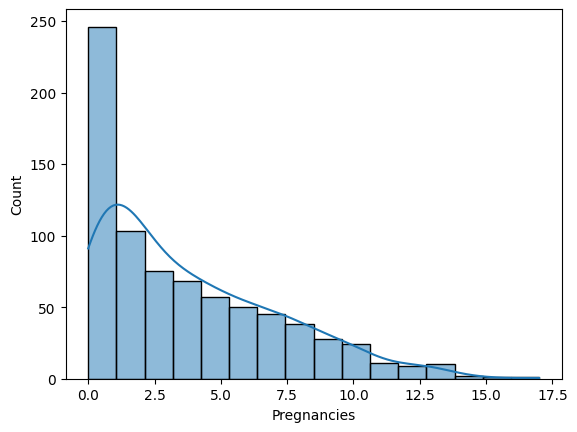

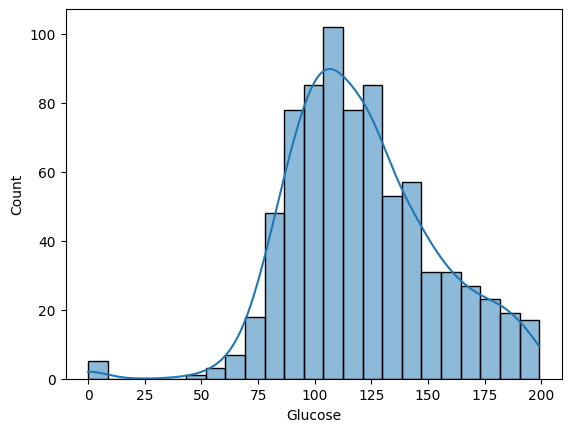

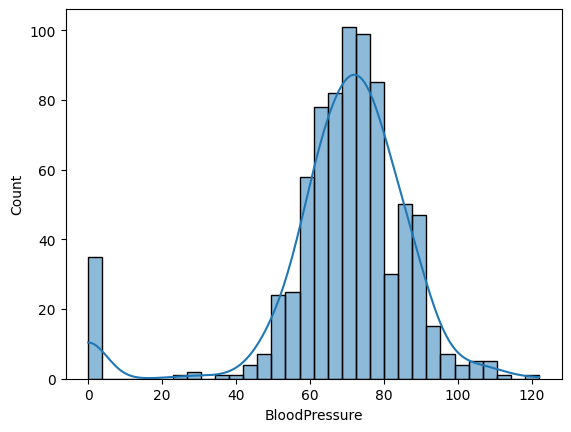

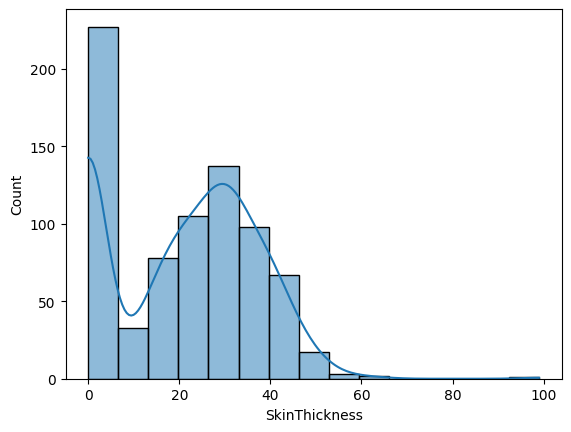

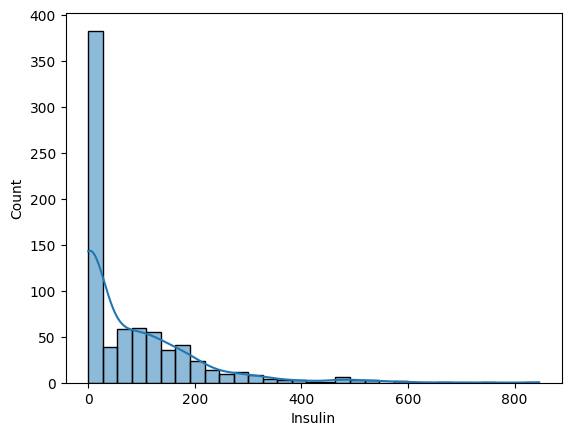

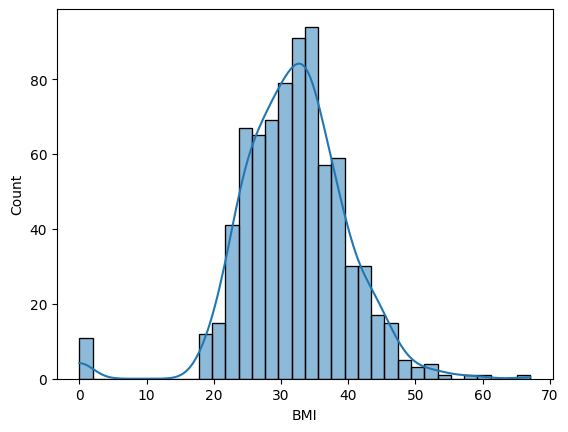

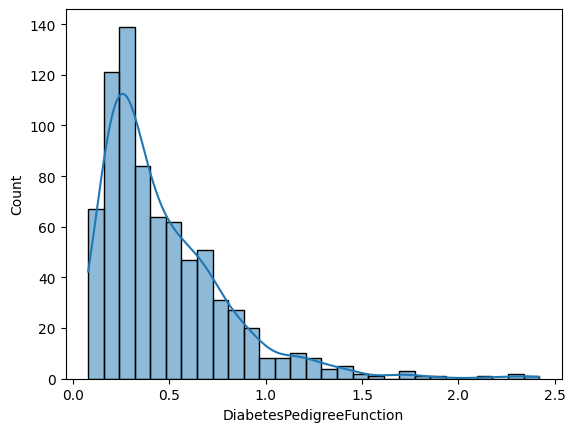

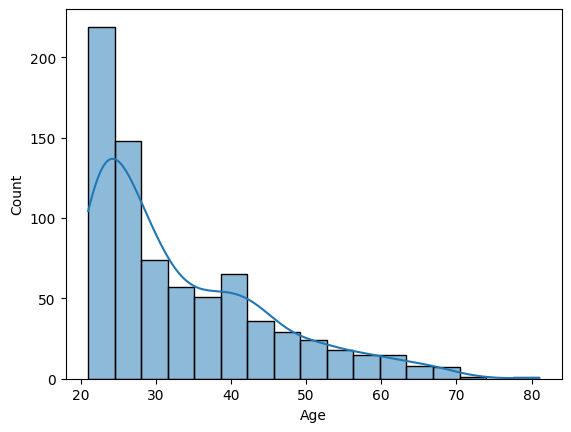

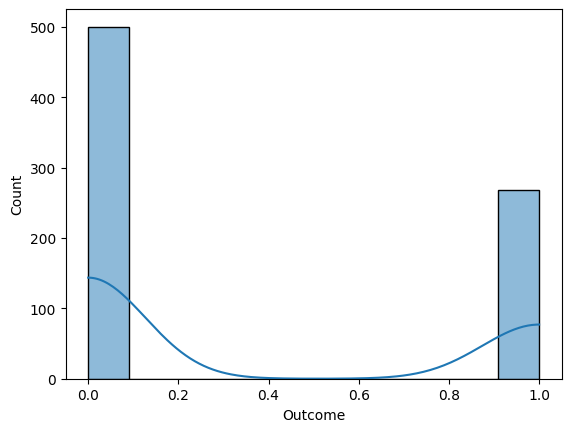

In [10]:
# 6.	Visualize the Data
for feature in data.columns:
    sns.histplot(data[feature], kde=True)
    plt.show()


In [12]:
# 7.Separate the feature and prediction value columns
x = data.iloc[: , :-1].values
y = data.iloc[: , -1].values
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [13]:
# 8.    Write the Hypothesis Function
def Hypothesis(theta, X):
    return Sigmoid(np.dot(X, theta))


In [14]:
# 9. Write the Cost Function
def Cost_function(theta, X, y):
    m = len(y)  # number of training examples
    h = Sigmoid(np.dot(X, theta))  # hypothesis (predicted probabilities)
    cost = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost


In [15]:
# 10.   Write the Gradient Descent optimization algorithm
def Gradient_Descent(X, y, theta_array, alpha, epochs):
    m = len(y)
    cost_history = []
    for i in range(epochs):
        h = Sigmoid(np.dot(X, theta_array))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta_array = theta_array - alpha * gradient
        cost = Cost_function(theta_array, X, y)
        cost_history.append(cost)
    return theta_array, cost_history


In [16]:
# 11.   Apply Feature Normalization technique over the data
x_train , train_mean , train_std = Feature_Normalization(x_train)
x_test , test_mean , test_std = Feature_Normalization(x_test)


In [17]:
# 12.   Apply the training over the dataset to minimize the loss
def Training(X, y, alpha, epochs):
    theta_array = np.zeros(X.shape[1])  # Initialize theta as a zero array with shape matching the number of features
    cost_history = []
    for i in range(epochs):
        theta_array, cost_history = Gradient_Descent(X, y, theta_array, alpha, epochs)
    return theta_array, cost_history
# Apply the Logistics Regression
alpha = 0.001
epochs = 100
theta_array , cost_history = Training(x_train  , y_train , alpha , epochs)


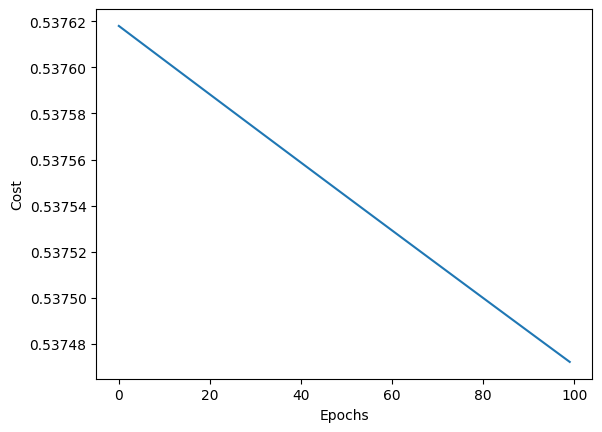

In [18]:
# 13.   Observe the cost function vs iterations learning curve
x = np.arange(0, epochs)
plt.plot(x, cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()
